In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
while 'notebooks' in os.getcwd():
    os.chdir('..')

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
n_cliques = 4
nodes_per_clique = 8
rewiring = 0.23
seed = 0

graph = nx.relaxed_caveman_graph(
    n_cliques,
    nodes_per_clique,
    rewiring,
    seed=seed)

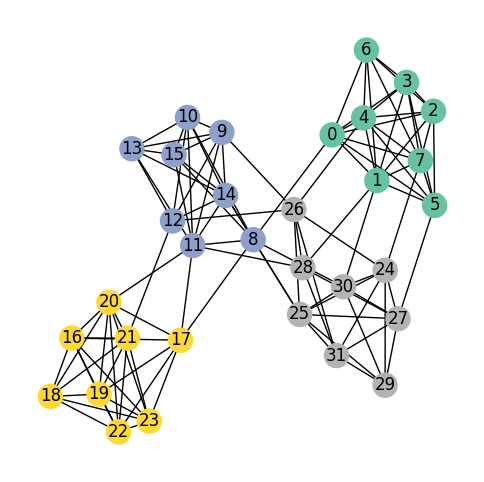

In [5]:
pos = nx.kamada_kawai_layout(graph)

node_classes = [x // nodes_per_clique for x in graph.nodes()]
class_dict = dict(zip(graph.nodes(), node_classes))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

nx.draw_networkx(
    graph,
    pos=pos,
    with_labels=True,
    node_color=node_classes,
    cmap='Set2',
    ax=ax)

ax.set_axis_off()

In [6]:
def is_same_class(edge, class_dict):
    return class_dict[edge[0]] == class_dict[edge[1]]

same_class_edges = [
    edge
    for edge in graph.edges()
    if is_same_class(edge, class_dict)]

diff_class_edges = [
    edge
    for edge in graph.edges()
    if not is_same_class(edge, class_dict)]

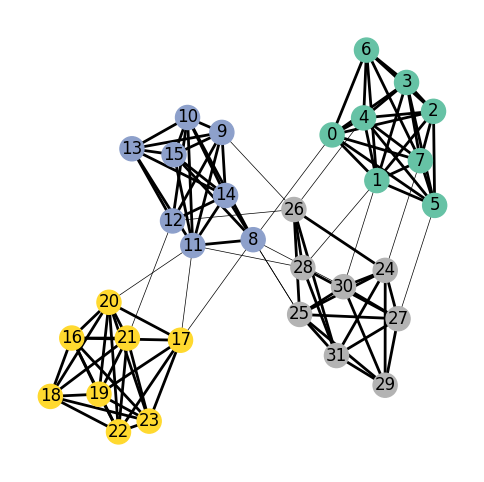

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

nx.draw_networkx_nodes(
    graph,
    pos=pos,
    node_color=node_classes,
    cmap='Set2',
    ax=ax)

nx.draw_networkx_labels(
    graph,
    pos=pos,
    labels={x: x for x in graph.nodes()},
    ax=ax)

nx.draw_networkx_edges(
    graph,
    pos=pos,
    edgelist=same_class_edges,
    width=2)

nx.draw_networkx_edges(
    graph,
    pos=pos,
    edgelist=diff_class_edges,
    width=0.5)

ax.set_axis_off()

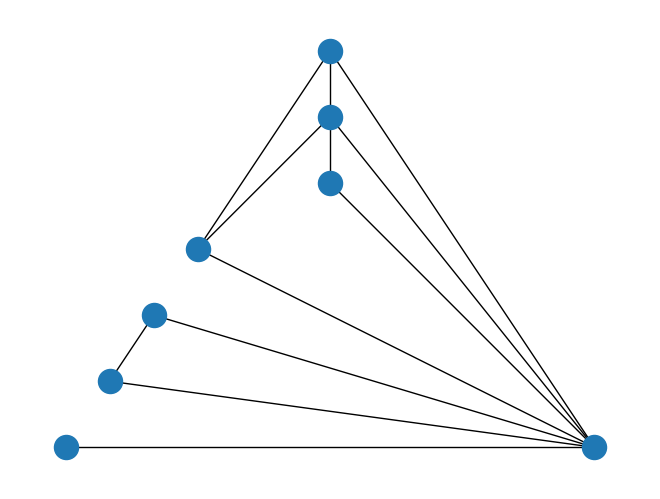

In [9]:
subgraph = nx.ego_graph(graph, 26)

nx.draw_planar(subgraph)